In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import constants

# Experimento 1: Espelhos girantes #


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/Semestre Atual/Laboratório Avançado/3 - Velocidade da Luz/Espelhos Giratórios/"
%cd  /content/drive/My Drive/Semestre Atual/Laboratório Avançado/3 - Velocidade da Luz/Espelhos Giratórios/

eg_data.csv
/content/drive/My Drive/Semestre Atual/Laboratório Avançado/3 - Velocidade da Luz/Espelhos Giratórios


In [7]:
 %cd  /content/drive/My Drive/Semestre Atual/Laboratório Avançado/3 - Velocidade da Luz/Espelhos Giratórios/

df_eg = pd.read_csv("eg_data.csv", header=0)
df_eg.head()

/content/drive/My Drive/Semestre Atual/Laboratório Avançado/3 - Velocidade da Luz/Espelhos Giratórios


,f(Hz),desvio_f(Hz),ds(mm),desvio_ds(mm)
0,207.3,0.16,0.88,0.2
1,263.6,0.81,1.31,0.2
2,328.4,0.71,1.08,0.2
3,395.2,1.07,1.90,0.2
4,457.9,0.62,2.32,0.2


coefficient of determination: 0.9843725151599755
slope: [0.00496405], intercept: -0.14229803393986318
velocity of light: [3.68664065e+08]
[   0    1    2 ... 1247 1248 1249]


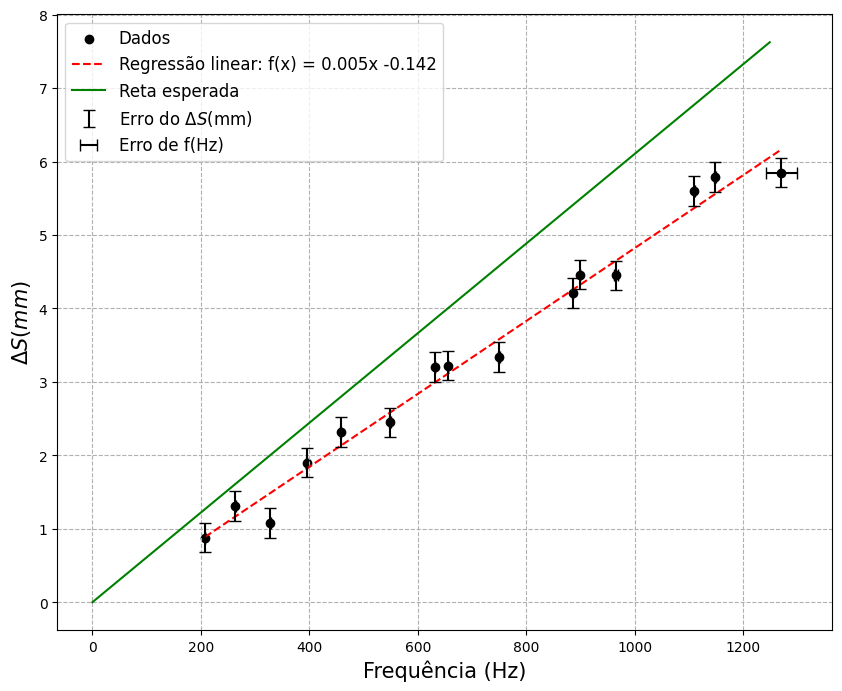

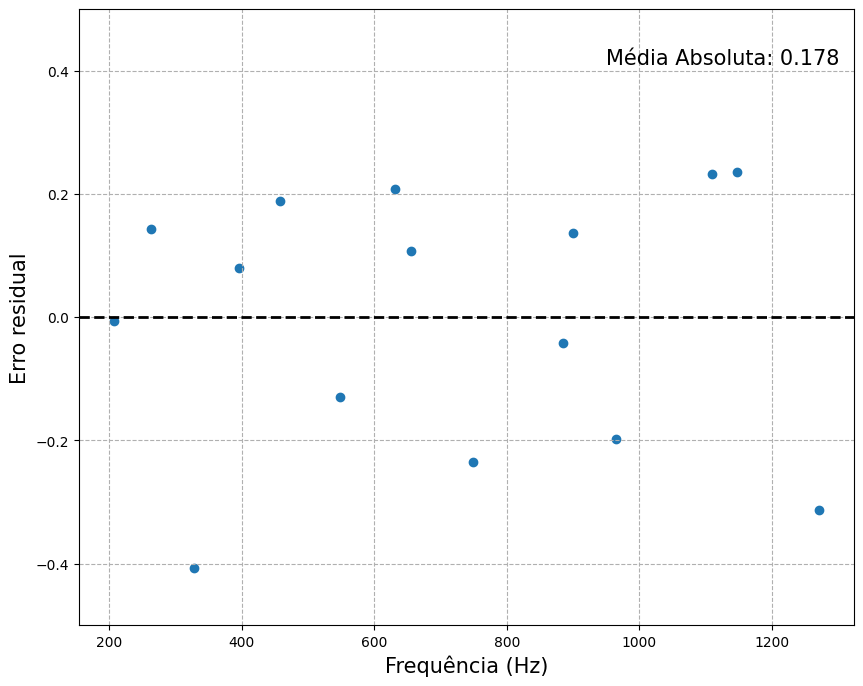

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x = np.array(df_eg[df_eg.columns[0]]).reshape(-1,1)
y = np.array(df_eg[df_eg.columns[2]])

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"slope: {model.coef_},", f"intercept: {model.intercept_}")

y_pred = model.predict(x)

error = y - y_pred
mean_abs = mean_absolute_error(y, y_pred)

R = 4.8
d = 15.17
v = ((8 * np.pi * R * d) / (model.coef_)) * 10 ** 3
print(f"velocity of light: {v}") #m/s

x_real = np.arange(0, 1250, 1)

y_real = (((8 * np.pi * R * d) / constants.c) * x_real) * (10 ** 3)

plt.figure(figsize=(10,8))
plt.scatter(x, y, color='black',label='Dados')
plt.plot(x, y_pred, color='red', linestyle="--", label=f'Regressão linear: f(x) = {model.coef_[0]:.3f}x {model.intercept_:.3f}')
plt.plot(x_real, y_real, color='green', linestyle="-", label=f'Reta esperada')
plt.errorbar(df_eg[df_eg.columns[0]], y, yerr = df_eg[df_eg.columns[3]], fmt='none', ecolor='black', capsize=4, label=r'Erro do $\Delta S$(mm)')
plt.errorbar(df_eg[df_eg.columns[0]], y, xerr = df_eg[df_eg.columns[1]], fmt="none", ecolor="black", capsize=4, label="Erro de f(Hz)")
plt.xlabel("Frequência (Hz)", fontsize=15)
plt.ylabel(r"$\Delta S (mm)$", fontsize=15)
plt.grid(True, linestyle='--')
plt.legend(fontsize = 12)
plt.show()

# Plot the error

plt.figure(figsize=(10,8))
plt.scatter(x, error)
plt.xlabel("Frequência (Hz)", fontsize=15)
plt.ylabel("Erro residual", fontsize=15)
plt.ylim(-0.5,0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.grid(True, linestyle='--')
plt.text(950, 0.41, s=f"Média Absoluta: {mean_abs:.3f}", fontsize=15)
plt.show()

392425954.0709289


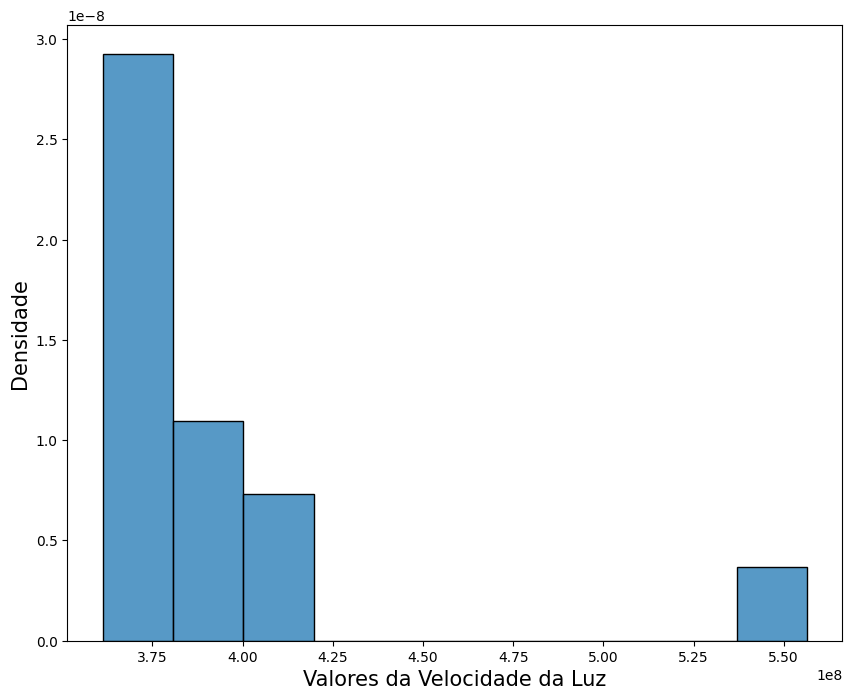

In [ ]:
#Histograma Espelho Girante

f = df_eg['f(Hz)']
ds = df_eg['S(mm) ']
v_col = []

for i in np.arange(len(f)):
  v_col.append(8*np.pi*f[i]*4.8*15.17*10**3/ds[i])

print(np.mean(np.array(v_col)))

plt.figure(figsize=(10,8))
sns.histplot(x=v_col, bins=10, stat="density")
plt.ylabel("Densidade", fontsize=15)
plt.xlabel("Valores da Velocidade da Luz", fontsize=15)
plt.show()


# Experimento 2: Pulsos #


In [ ]:
df = pd.read_csv("dados_pulsos.csv", header=0)
df2 = pd.read_csv("dados_pulso(0,0).csv", header=0)
df2.head()

,Distância,Tempo
0,20.064,6.600000e-08
1,25.810,9.000000e-08
2,30.840,1.100000e-07
3,36.940,1.360000e-07
4,42.260,1.600000e-07


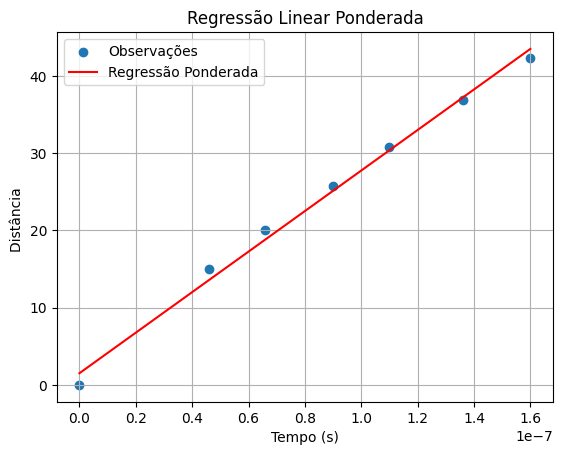

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_weights(residuals):
    # Calcula os pesos com base nos resíduos
    weights = 1 / (np.abs(residuals) + 1)
    return weights

def weighted_linear_regression(X, y, weights):
    # Adiciona uma coluna de 1s para o viés
    X_augmented = np.c_[np.ones(X.shape[0]), X]

    # Calcula a matriz de covariância ponderada
    C = np.diag(weights)

    # Calcula os coeficientes da regressão ponderada
    w_wlr = np.linalg.inv(X_augmented.T @ np.linalg.inv(C) @ X_augmented) @ (X_augmented.T @ np.linalg.inv(C) @ y)

    return w_wlr

# Extrai os valores de X e y
X = df2['Tempo']
y = df2['Distância']

# Calcula a regressão linear com pesos
# Solução da regressão linear
w_lr = np.linalg.inv(np.c_[np.ones(X.shape[0]), X].T @ np.c_[np.ones(X.shape[0]), X]) @ np.c_[np.ones(X.shape[0]), X].T @ y

# calculate residuals
residuals = y - np.c_[np.ones(X.shape[0]), X] @ w_lr

# calculate weights
weights = calculate_weights(residuals)

# Calcula os coeficientes da regressão ponderada
w_wlr = weighted_linear_regression(X, y, weights)

# Gera o conjunto de recursos para plotagem
X_plot = np.linspace(X.min(), X.max(), 100)
X_plot_augmented = np.c_[np.ones(100), X_plot]

# Calcula as previsões
y_pred = X_plot_augmented @ w_wlr

intercept = w_wlr[0]
slope = w_wlr[1]

# Plota os resultados
plt.scatter(X, y, label='Observações')
plt.plot(X_plot, y_pred, color='red', label='Regressão Ponderada', )
plt.xlabel('Tempo (s)')
plt.ylabel('Distância ')
plt.title('Regressão Linear Ponderada')
plt.legend()
plt.grid(True)
plt.show()

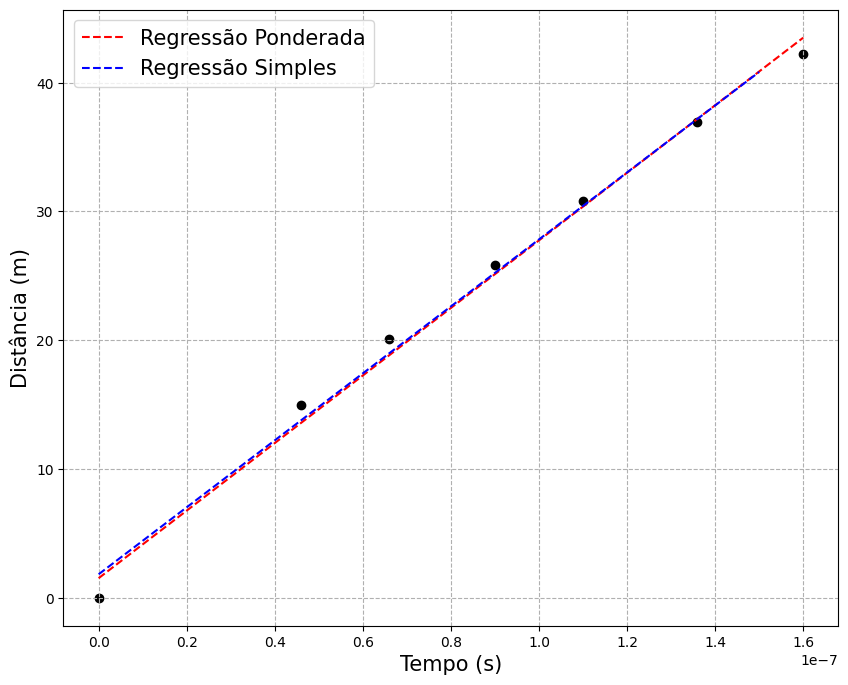

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr2 = LinearRegression()
model = lr.fit(np.array(df["Tempo"]).reshape(-1,1), df["Distância"])
model2 = lr2.fit(np.array(df2["Tempo"]).reshape(-1,1), df2["Distância"])


x = np.arange(0e-8, 1.7e-7, 2.5e-8)
y = model.predict(np.array(x).reshape(-1,1))
y2 = model2.predict(np.array(x).reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(df2["Tempo"], df2["Distância"], c="black")
plt.plot(X_plot, y_pred, color='red', label='Regressão Ponderada', linestyle="--")
plt.plot(x, y2, linestyle="--", label="Regressão Simples", c="b")
plt.grid(True, linestyle="--")
plt.xlabel("Tempo (s)", fontsize=15)
plt.ylabel("Distância (m)", fontsize=15)
plt.legend(fontsize=15)
plt.show()



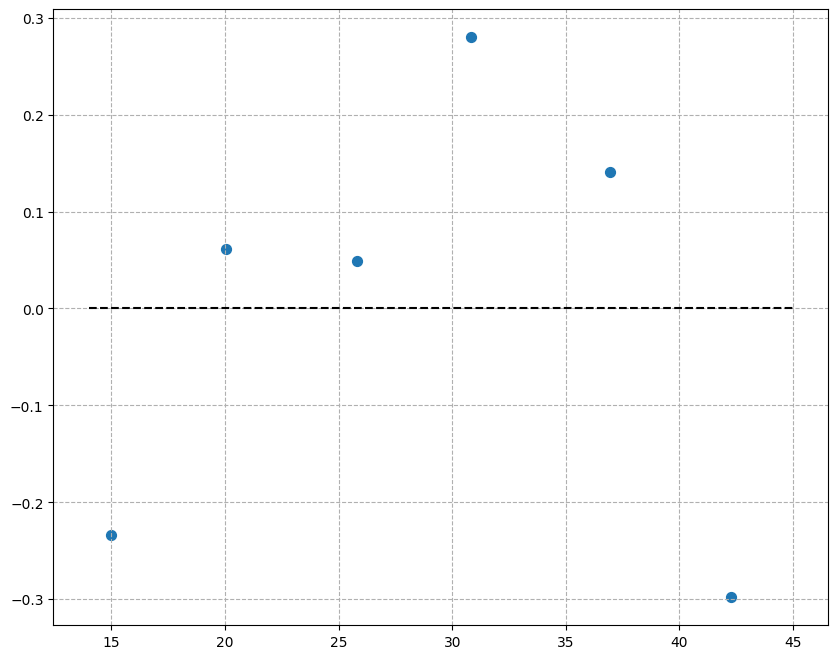

In [ ]:
y_pred = model.predict(np.array(df["Tempo"]).reshape(-1,1))
erro = df["Distância"] - y_pred

plt.figure(figsize=(10,8))
plt.grid(True, linestyle='--')
plt.scatter(df["Distância"], erro, s=50)
plt.hlines(y=0, xmin=14, xmax=45, linestyle="--", colors='black')
plt.show()

# Experimento 3: Modulação Temporal #

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/Semestre Atual/Laboratório Avançado/3 - Velocidade da Luz/fase/ALL0000"
%cd  /content/drive/My Drive/Semestre Atual/Laboratório Avançado/3 - Velocidade da Luz/fase/

F0000CH1.CSV  F0000CH2.CSV  F0000TEK.RLE  F0000TEK.SET
/content/drive/My Drive/Semestre Atual/Laboratório Avançado/3 - Velocidade da Luz/fase


In [ ]:
%cd  /content/drive/My Drive/Semestre Atual/Laboratório Avançado/3 - Velocidade da Luz/fase/ALL0000

df1 = pd.read_csv("data.csv", header=0)
df1.head()

/content/drive/My Drive/Semestre Atual/Laboratório Avançado/3 - Velocidade da Luz/fase/ALL0000


,time(ch1),voltage(ch1),time(ch2),voltage(ch2)
0,-0.000013,-2.2436,-0.000013,-60.48
1,-0.000012,-2.2120,-0.000012,-60.48
2,-0.000012,-2.2120,-0.000012,-59.04
3,-0.000012,-2.1804,-0.000012,-60.48
4,-0.000012,-2.2120,-0.000012,-60.48


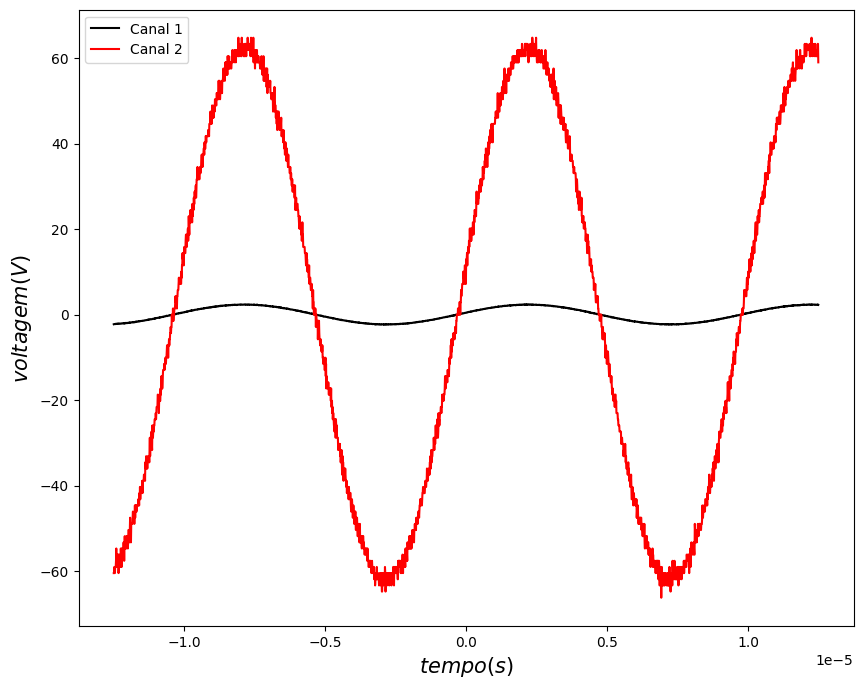

In [ ]:
x1 = np.array(df1["time(ch1)"]).reshape(-1,1)
y1 = np.array(df1["voltage(ch1)"])

x2 = np.array(df1["time(ch2)"]).reshape(-1,1)
y2 = np.array(df1["voltage(ch2)"])

plt.figure(figsize=(10,8))
plt.plot(x1, y1, color='black',label='Canal 1')
plt.plot(x2, y2, color='red',label='Canal 2')
plt.xlabel(r"$tempo (s)$", fontsize=15)
plt.ylabel(r"$voltagem (V)$", fontsize=15)
plt.legend()
plt.show()